In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
restaurants=pd.read_csv("paris\paris_restaurants.csv")

In [53]:
restaurants.head()

,type,x,y
0,European restuarant,259641.691646,6.251867e+06
1,Traditional French restaurant,259572.339603,6.252030e+06
2,Traditional French restaurant,259657.276374,6.252143e+06
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06
4,Traditional French restaurant,259597.943086,6.252230e+06


In [5]:
type(resturants)

pandas.core.frame.DataFrame

Visualization: the data type is DataFrame, therfore us plt.subplot() to draw the resturant location , not resturants.plot()

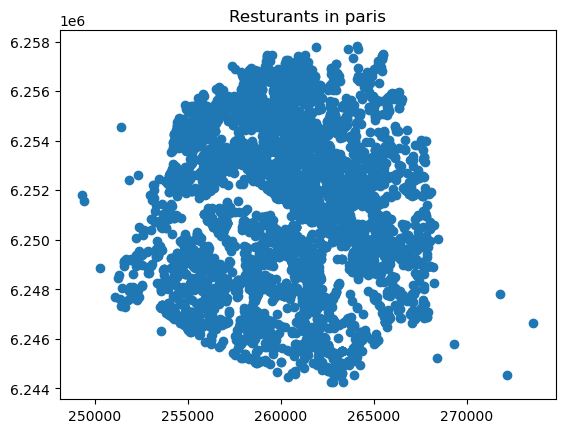

In [54]:
fig, ax=plt.subplots()
ax.plot(restaurants['x'],restaurants['y'],'o')
plt.title('Resturants in paris')
plt.show()



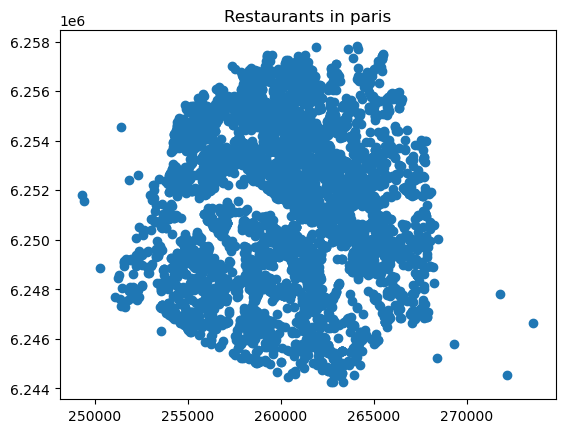

In [55]:
plt.plot(resturants['x'],resturants['y'],'o')
plt.title('Restaurants in paris')
plt.show()

# HOW TO ADD BACKGROUND MAP

A plot with just some points can be hard to interpret without any spatial context. Therefore,  add a background map using contextily package.
add_basemap() function. contextily will then download the web tiles needed for the geographical extent of your plot.

In [8]:
import contextily
import folium

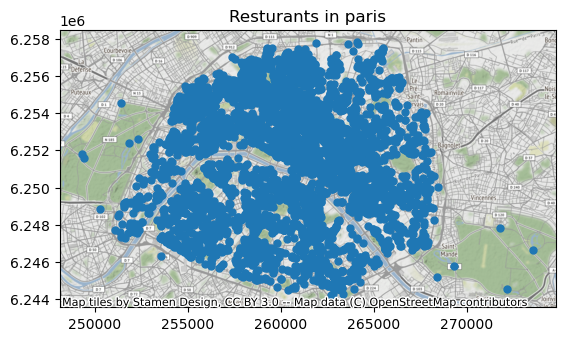

In [56]:
fig, ax=plt.subplots()
ax.plot(restaurants['x'],restaurants['y'],'o', markersize=5)
plt.title('Resturants in paris')
contextily.add_basemap(ax)
plt.show()

# GEOPANDAS
Visualize administrative districts of Paris (compiled from a Paris Data open dataset).

In [3]:
import geopandas as gpd

In [4]:
Districts=gpd.read_file("paris\paris_districts_utm.geojson")

In [44]:
Districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


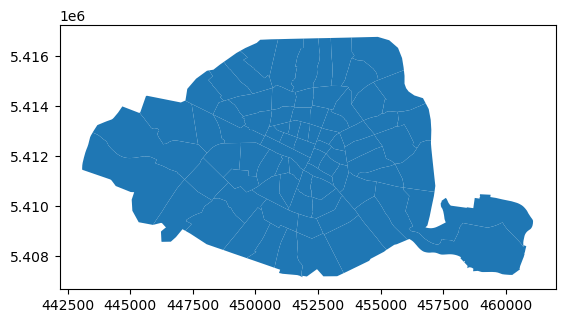

In [46]:
Districts.plot()
plt.show()

In [47]:
type(Districts)

geopandas.geodataframe.GeoDataFrame

Calculate the Area of each district in paris

In [51]:
# Check what kind of object districts is
print(type(Districts))

# Check the type of the geometry attribute
print(type(Districts.geometry))

# Inspect the first rows of the geometry
print(Districts.geometry.head())

# Inspect the area of the districts
print(Districts.geometry.area)

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
0    POLYGON ((451922.133 5411438.484, 451922.080 5...
1    POLYGON ((452278.419 5412160.893, 452192.407 5...
2    POLYGON ((451553.806 5412340.522, 451528.058 5...
3    POLYGON ((451004.908 5412654.095, 450960.640 5...
4    POLYGON ((451328.752 5412991.278, 451294.721 5...
Name: geometry, dtype: geometry
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


# DataFrame to GeoDataFrame
convert restaurants DataFrame to GeoDataFrame using,

restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.x, df.y))

In [61]:
G_restaurants = gpd.GeoDataFrame(restaurants, geometry=gpd.points_from_xy(restaurants.x, restaurants.y))

In [62]:
G_restaurants.head()

,type,x,y,geometry
0,European restuarant,259641.691646,6.251867e+06,POINT (259641.692 6251867.063)
1,Traditional French restaurant,259572.339603,6.252030e+06,POINT (259572.340 6252029.683)
2,Traditional French restaurant,259657.276374,6.252143e+06,POINT (259657.276 6252143.401)
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06,POINT (259684.438 6252203.137)
4,Traditional French restaurant,259597.943086,6.252230e+06,POINT (259597.943 6252230.044)


In [63]:
type(G_restaurants)

geopandas.geodataframe.GeoDataFrame

<function matplotlib.pyplot.show(close=None, block=None)>

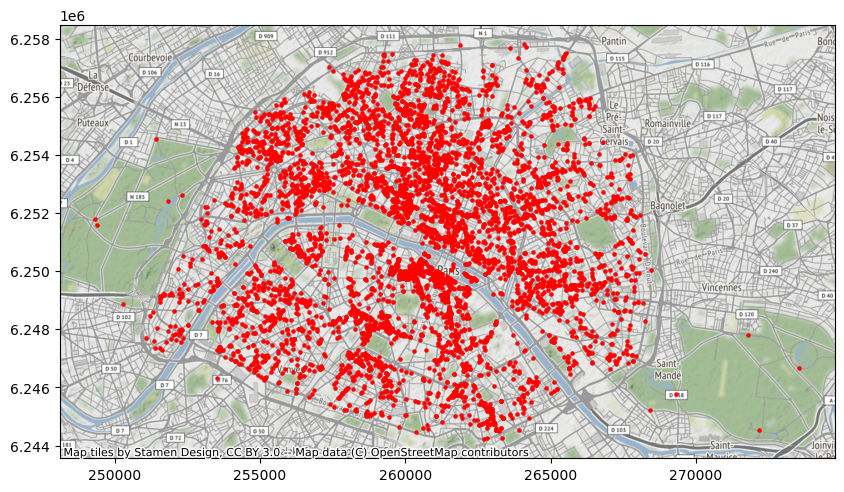

In [69]:
ax=G_restaurants.plot(figsize=(10,10), markersize=5, color='red')
contextily.add_basemap(ax)
plt.show


# Exploring and visualizing Spatial Data using countries geojson data

In [70]:
countries=gpd.read_file("countries.geo.json")

In [71]:
countries.head()

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


<Axes: >

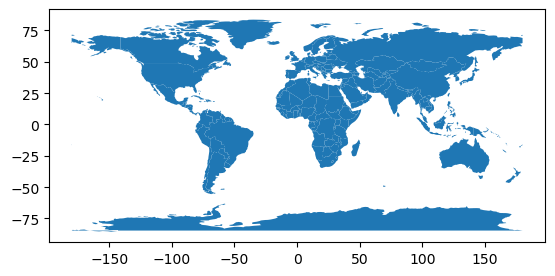

In [73]:
countries.plot()

In [76]:
countries['name']=='Ethiopia'

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Name: name, Length: 180, dtype: bool

<Axes: >

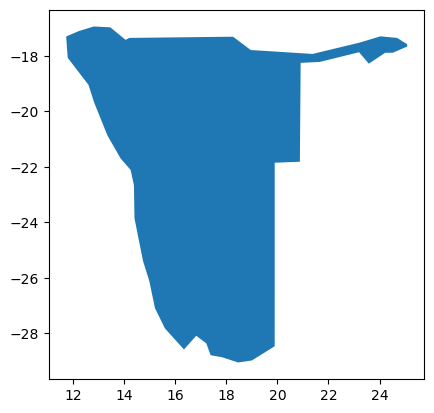

In [80]:
#Selection by Name=Namibia
nam=countries[countries['name']=='Namibia']
nam.plot()

In [83]:
gw=gpd.read_file("GW_Nam\GW_Well_Data.shp")

In [84]:
gw.head()

,sadc_bhid,natl_bhid,bh_type,country,long_wgs84,lat_wgs84,geod_datum,elev_m_dem,elev_m_sub,bh_depth_m,...,f_mg_l,no3_mg_l,lith_subm,reliabilit,activ_stat,hgm_litho,hgm_aqtype,hgm_produc,wgs84,geometry
0,556696.0,23975.0,unknown,Namibia,16.16413,-23.29761,WGS84,1288.0,1230.0,-9999.0,...,-9999.0,-9999.0,NO_DATA,unknown,unknown,Tillite and diamictite,Low potential,"Generally low, but locally moderate potential",16.16413 -23.29761,POINT (619044.335 7423055.917)
1,562550.0,34583.0,unknown,Namibia,15.84757,-21.93623,WGS84,1170.0,1163.0,77.0,...,-9999.0,33.0,NO_DATA,unknown,unknown,Dolomite and limestone,Low potential,"Generally low, but locally moderate potential",15.84757 -21.93623,POINT (587528.269 7573989.597)
2,551269.0,10653.0,unknown,Namibia,14.70629,-23.22601,WGS84,169.0,163.0,21.0,...,-9999.0,-9999.0,NO_DATA,unknown,unknown,Unconsolidated sands and gravel,Low potential,Generally low potential,14.70629 -23.22601,POINT (469950.406 7431430.263)
3,560632.0,31229.0,unknown,Namibia,14.54011,-21.90231,WGS84,237.0,-9999.0,-9999.0,...,-9999.0,-9999.0,NO_DATA,unknown,unknown,"Paragneiss, quartzite, schiste, phyllite, amph...",Low potential,Generally low potential,14.54011 -21.90231,POINT (452496.952 7577914.776)
4,575133.0,65947.0,unknown,Namibia,14.50571,-23.12971,WGS84,13.0,20.0,-9999.0,...,-9999.0,-9999.0,NO_DATA,unknown,unknown,Unconsolidated sands and gravel,Unconsolidated intergranular,"Unconsolidated intergranular aquifers, moderat...",14.50571 -23.12971,POINT (449392.500 7442035.508)


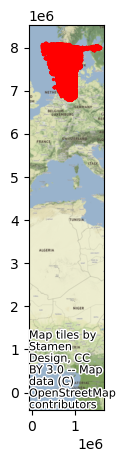

In [107]:
fig, ax=plt.subplots(figsize=(5,5))# defining the axes(drawing area)
nam.plot(ax=ax, color='none')#ax=ax indicates the plot should be in the same drawing area
gw.plot(ax=ax, color='red', markersize=2)
contextily.add_basemap(ax)


# Visualizing the population density


Q:visualize the spatial variation of the population density within the center of Paris

In [108]:
Districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


In [109]:
print(Districts.geometry.area)

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


In [6]:
# Add a population density column
Districts['population_density']=Districts['population']/(Districts.geometry.area)

In [115]:
Districts.head()

,id,district_name,population,geometry,population_density
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",0.001925
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",0.021793
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",0.011680
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",0.011303
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",0.007158


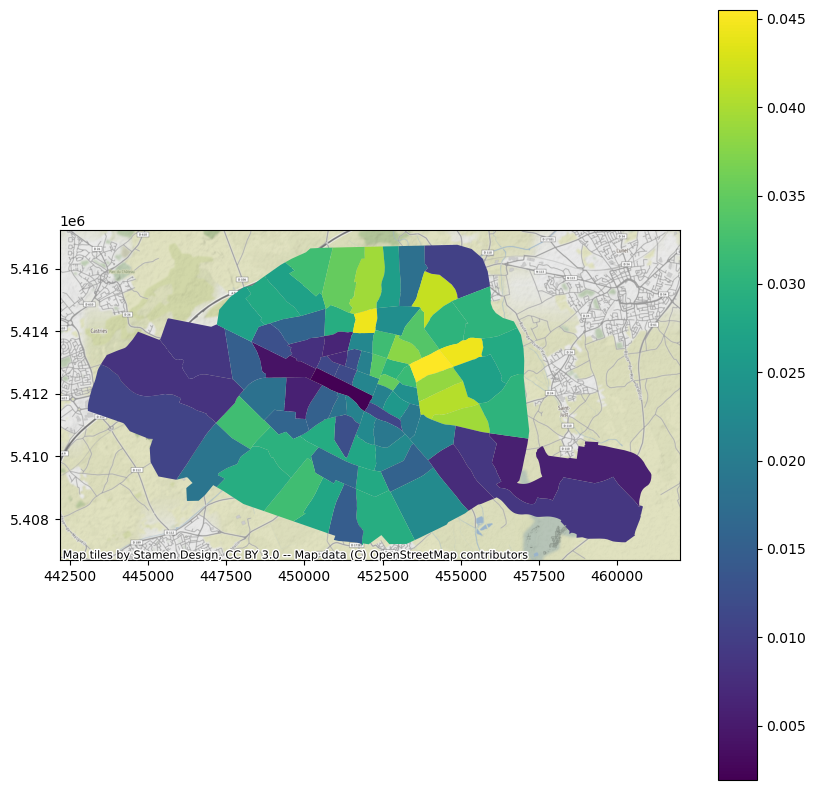

In [10]:
# Make a plot of the districts colored by the population density
ax=Districts.plot(column='population_density', legend=True, figsize=(10,10))
contextily.add_basemap(ax)


# Using pandas functionality: groupby
Using groupby(), group the restaurants by the type of restaurants, and calculate the size of each group. Call the result type_counts.

In [12]:
import pandas as pd

In [17]:
restaurants=pd.read_csv("paris\paris_restaurants.csv")

In [18]:
restaurants.head()

,type,x,y
0,European restuarant,259641.691646,6.251867e+06
1,Traditional French restaurant,259572.339603,6.252030e+06
2,Traditional French restaurant,259657.276374,6.252143e+06
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06
4,Traditional French restaurant,259597.943086,6.252230e+06


In [22]:
# calculate the number of restaurants for each group
type_counts = restaurants.groupby('type').size()


In [23]:
print(type_counts)

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64


# Plotting multiple layers
taking a subset of the rows based on a condition (which generates a boolean mask).

take the subset of all African restaurants, and then make a multi-layered plot. In such a plot,  combine the visualization of several GeoDataFrames on a single figure. 

To add one layer,  use the ax keyword of the plot() method of a GeoDataFrame to pass it a matplotlib axes object.

The restaurants data is already loaded as the restaurants GeoDataFrame. 

GeoPandas is imported as geopandas and matplotlib.pyplot as plt.

In [33]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [35]:
restaurants=gpd.GeoDataFrame(restaurants, geometry=gpd.points_from_xy(restaurants.x, restaurants.y))

In [38]:
restaurants

,type,x,y,geometry
0,European restuarant,259641.691646,6.251867e+06,POINT (259641.692 6251867.063)
1,Traditional French restaurant,259572.339603,6.252030e+06,POINT (259572.340 6252029.683)
2,Traditional French restaurant,259657.276374,6.252143e+06,POINT (259657.276 6252143.401)
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06,POINT (259684.438 6252203.137)
4,Traditional French restaurant,259597.943086,6.252230e+06,POINT (259597.943 6252230.044)
...,...,...,...,...
5730,Asian restaurant,259415.267801,6.253554e+06,POINT (259415.268 6253553.831)
5731,European restuarant,259039.341881,6.253967e+06,POINT (259039.342 6253966.817)
5732,Asian restaurant,267737.067655,6.251037e+06,POINT (267737.068 6251037.256)
5733,Maghrebian restaurant,267811.874353,6.250977e+06,POINT (267811.874 6250976.682)


In [48]:
European_restuarant = restaurants['type'] == 'European restuarant'

In [45]:
European_restuarant

0        True
1       False
2       False
3       False
4       False
        ...  
5730    False
5731     True
5732    False
5733    False
5734    False
Name: type, Length: 5735, dtype: bool

TypeError: no numeric data to plot

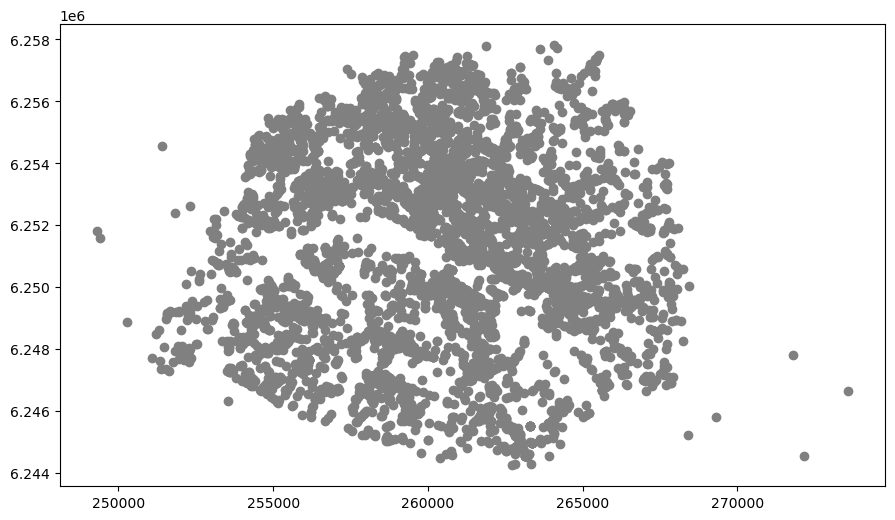

In [51]:
fig, ax=plt.subplots(figsize=(12,6))
restaurants.plot(ax=ax, color='grey')
European_restuarant.plot(ax=ax, color='red')
plt.show()